<a href="https://colab.research.google.com/github/donghyuun/deep-learning/blob/main/lab_05_1_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

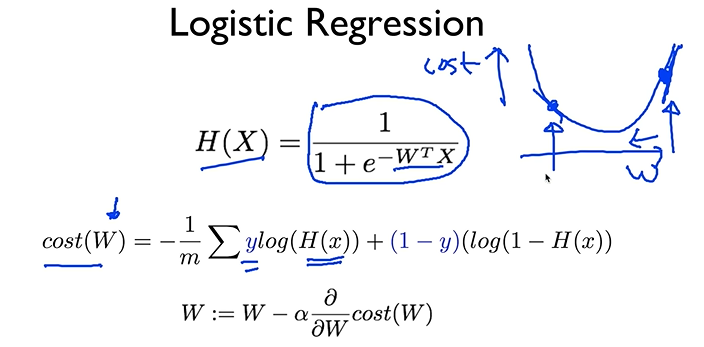

In [4]:
import tensorflow as tf
import numpy as np

# Data: 입력 데이터와 레이블 데이터 정의
# x_data: 입력 데이터로 2개의 특징(feature)을 가지는 6개의 샘플
# y_data: 출력 데이터(레이블)로 0 또는 1을 가지는 이진 분류 문제
x_data = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]], dtype=np.float32)
y_data = np.array([[0], [0], [0], [1], [1], [1]], dtype=np.float32)

# Variables: 학습 가능한 가중치와 편향 정의
# W: 입력 데이터의 특징 개수(2)에 따라 [2, 1] 크기의 가중치(weight) 행렬 초기화
# b: 출력 데이터의 크기(1)에 따라 [1] 크기의 편향(bias) 초기화
W = tf.Variable(tf.random.normal([2, 1]), name='weight')  # 가중치 초기화
b = tf.Variable(tf.random.normal([1]), name='bias')       # 편향 초기화

# Sigmoid hypothesis function
# 가설(hypothesis) 함수 정의
# 입력 데이터 X에 대해 W와 b를 사용해 로지스틱 회귀를 수행한 후, sigmoid 함수를 적용
# sigmoid 함수는 로지스틱 회귀에서 출력값을 확률 값으로 변환
def hypothesis(X):
    return tf.sigmoid(tf.matmul(X, W) + b)  # X*W + b에 sigmoid 적용

# Loss function
# 비용 함수 정의
# Cross-Entropy Loss: Y와 hypothesis 간의 차이를 계산
# h: 예측값(hypothesis), Y: 실제 값(label)
# 로그 계산의 안정성을 위해 작은 값을 더함(+1e-8)
def compute_loss(X, Y):
    h = hypothesis(X)
    return -tf.reduce_mean(Y * tf.math.log(h + 1e-8) + (1 - Y) * tf.math.log(1 - h + 1e-8))

hypothesis

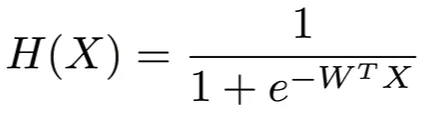

cost function

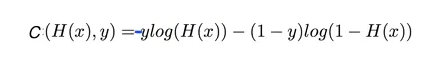

In [6]:

# Training step
# 최적화 함수 정의
# SGD(Stochastic Gradient Descent) 옵티마이저를 사용하여 학습 속도(learning_rate)는 0.01로 설정
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 단일 학습 스텝 수행
# GradientTape: TensorFlow에서 자동으로 미분(gradient)을 계산해주는 유틸리티
# tape.gradient 는 loss 를 계산하는 과정에서 W와 b가 어떤 연산을 통해 기여했는지를 기록하여,
# 편미분 값을 자동으로 계산한다!!
# gradients: 비용 함수에 대한 W와 b의 기울기를 계산
# optimizer.apply_gradients: 계산된 기울기를 사용해 W와 b를 업데이트
def train_step(X, Y):
    with tf.GradientTape() as tape:
        loss = compute_loss(X, Y)  # 비용(loss) 계산 (cost function 의 value)
    gradients = tape.gradient(loss, [W, b])  # W와 b에 대한 gradient(기울기, 편미분값) 계산
    optimizer.apply_gradients(zip(gradients, [W, b]))  # 학습률을 반영한 가중치와 편향 업데이트
# tape
#
#

# Training loop
# 학습 루프: 10001번 반복하며 W와 b를 점진적으로 최적화
for step in range(10001):
    train_step(x_data, y_data)  # 데이터(x_data, y_data)를 사용하여 학습
    if step % 200 == 0:  # 200번마다 현재 비용 출력
        current_loss = compute_loss(x_data, y_data).numpy()  # 비용 계산
        print(f"Step: {step}, Loss: {current_loss:.4f}")  # 학습 단계와 비용 출력

# Prediction and accuracy
# 예측 및 정확도 계산
# 예측값(predicted)은 hypothesis 값이 0.5를 초과하면 1, 아니면 0으로 설정
# 정확도(accuracy)는 예측값과 실제값이 얼마나 일치하는지 계산
def accuracy(X, Y):
    h = hypothesis(X)  # 예측값 계산
    predicted = tf.cast(h > 0.5, dtype=tf.float32)  # 0.5 초과 시 1, 아니면 0
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))  # 정확도 계산
    return predicted.numpy(), accuracy.numpy()  # 예측값과 정확도 반환

# 학습된 모델로 예측 및 정확도 출력
predicted, acc = accuracy(x_data, y_data)  # 예측값과 정확도 계산
print("\nHypothesis:\n", hypothesis(x_data).numpy())  # 예측된 확률 출력
print("\nPredicted:\n", predicted)  # 0 또는 1로 변환된 예측값 출력
print("\nAccuracy:\n", acc)  # 정확도 출력


Step: 0, Loss: 0.5065
Step: 200, Loss: 0.4360
Step: 400, Loss: 0.4004
Step: 600, Loss: 0.3782
Step: 800, Loss: 0.3619
Step: 1000, Loss: 0.3485
Step: 1200, Loss: 0.3369
Step: 1400, Loss: 0.3263
Step: 1600, Loss: 0.3165
Step: 1800, Loss: 0.3074
Step: 2000, Loss: 0.2987
Step: 2200, Loss: 0.2905
Step: 2400, Loss: 0.2827
Step: 2600, Loss: 0.2753
Step: 2800, Loss: 0.2682
Step: 3000, Loss: 0.2614
Step: 3200, Loss: 0.2550
Step: 3400, Loss: 0.2488
Step: 3600, Loss: 0.2429
Step: 3800, Loss: 0.2372
Step: 4000, Loss: 0.2318
Step: 4200, Loss: 0.2267
Step: 4400, Loss: 0.2217
Step: 4600, Loss: 0.2169
Step: 4800, Loss: 0.2124
Step: 5000, Loss: 0.2080
Step: 5200, Loss: 0.2037
Step: 5400, Loss: 0.1997
Step: 5600, Loss: 0.1958
Step: 5800, Loss: 0.1920
Step: 6000, Loss: 0.1884
Step: 6200, Loss: 0.1849
Step: 6400, Loss: 0.1815
Step: 6600, Loss: 0.1783
Step: 6800, Loss: 0.1751
Step: 7000, Loss: 0.1721
Step: 7200, Loss: 0.1692
Step: 7400, Loss: 0.1664
Step: 7600, Loss: 0.1636
Step: 7800, Loss: 0.1610
Step: 8